###캐글 타이타닉 필사

[필사에 참고한 링크](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
#오류 무시
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/test.csv')
combine = [train_df, test_df]

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Categorical feature
- Survived, Sex and Embarked
- Ordinal : Pclass

Numerical feature
- Continous : Age, Fare
- Discrete : SibSp, Parch

In [7]:
#preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mix feature
- Ticket, Cabin

Feature of contain error 
- Name(이름 특성에는 오타가 존재) 

In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Feature of contain blank, null or empty value
- Cabin > Age > Embarked (train_df)
- Cabin > Age > Fare(Fare have 1 nan value)

In [9]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

What is data type?
- train_df have seven integer or float
- test_df have six integer or float
- both five object type

In [11]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nenkoff, Mr. Christo",male,347082,G6,S
freq,1,577,7,4,644


In [14]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


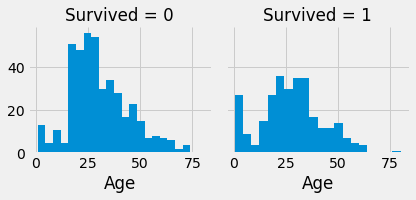

In [18]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

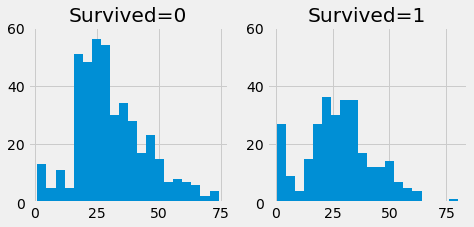

In [19]:
fig, axes = plt.subplots(1,2,figsize=(7,3))
y = list(range(0,80,20))
train_df[train_df['Survived']==0]['Age'].plot.hist(ax=axes[0],bins=20)
axes[0].set_title('Survived=0')
axes[0].set_yticks(y)
axes[0].set_ylabel('')
train_df[train_df['Survived']==1]['Age'].plot.hist(ax=axes[1],bins=20)
axes[1].set_title('Survived=1')
axes[1].set_yticks(y)
axes[1].set_ylabel('')
plt.show()

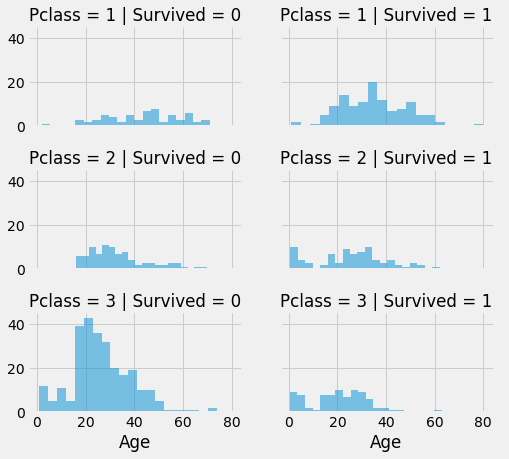

In [20]:
grid = sns.FacetGrid(data=train_df, row='Pclass',col='Survived',aspect=1.6,size=2.2)
grid.map(plt.hist, 'Age',alpha=0.5, bins=20)
grid.add_legend()

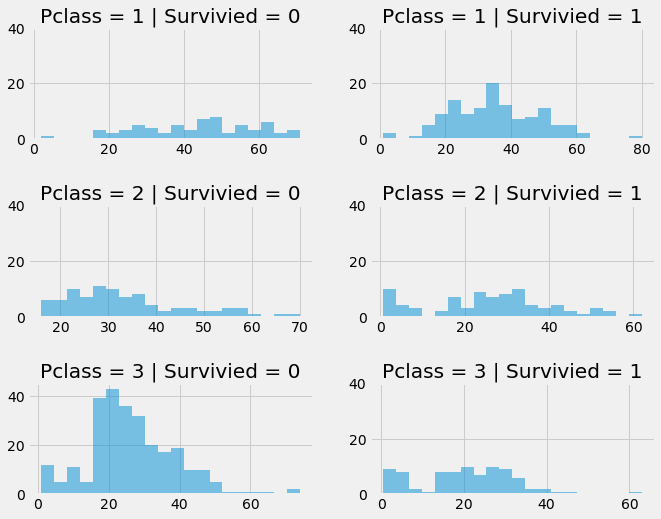

In [21]:
fig, axes = plt.subplots(3,2,figsize=(10,8))
y = list(range(0,60,20))
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==1),'Age'].plot.hist(ax=axes[0,0],bins=20,alpha=0.5)
axes[0,0].set_title('Pclass = 1 | Survivied = 0')
axes[0,0].set_yticks(y)
axes[0,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==1),'Age'].plot.hist(ax=axes[0,1],bins=20,alpha=0.5)
axes[0,1].set_title('Pclass = 1 | Survivied = 1')
axes[0,1].set_yticks(y)
axes[0,1].set_ylabel('')
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==2),'Age'].plot.hist(ax=axes[1,0],bins=20,alpha=0.5)
axes[1,0].set_title('Pclass = 2 | Survivied = 0')
axes[1,0].set_yticks(y)
axes[1,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==2),'Age'].plot.hist(ax=axes[1,1],bins=20,alpha=0.5)
axes[1,1].set_title('Pclass = 2 | Survivied = 1')
axes[1,1].set_yticks(y)
axes[1,1].set_ylabel('')
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==3),'Age'].plot.hist(ax=axes[2,0],bins=20,alpha=0.5)
axes[2,0].set_title('Pclass = 3 | Survivied = 0')
axes[2,0].set_yticks(y)
axes[2,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==3),'Age'].plot.hist(ax=axes[2,1],bins=20,alpha=0.5)
axes[2,1].set_title('Pclass = 3 | Survivied = 1')
axes[2,1].set_yticks(y)
axes[2,1].set_ylabel('')
plt.subplots_adjust(hspace=0.6,wspace=0.2)
plt.show()

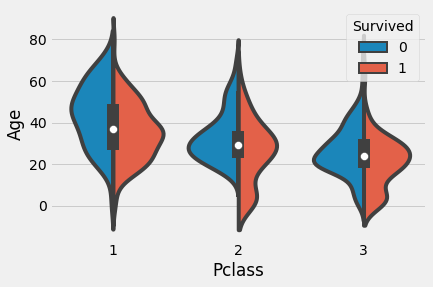

In [22]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train_df, split=True)
plt.show()

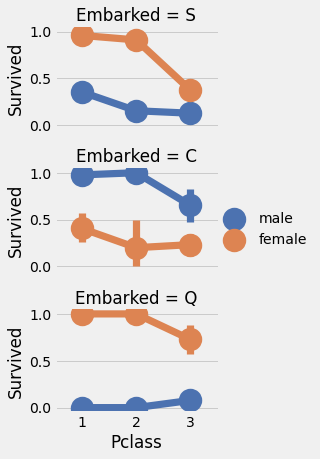

In [23]:
grid = sns.FacetGrid(data=train_df, row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot , 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

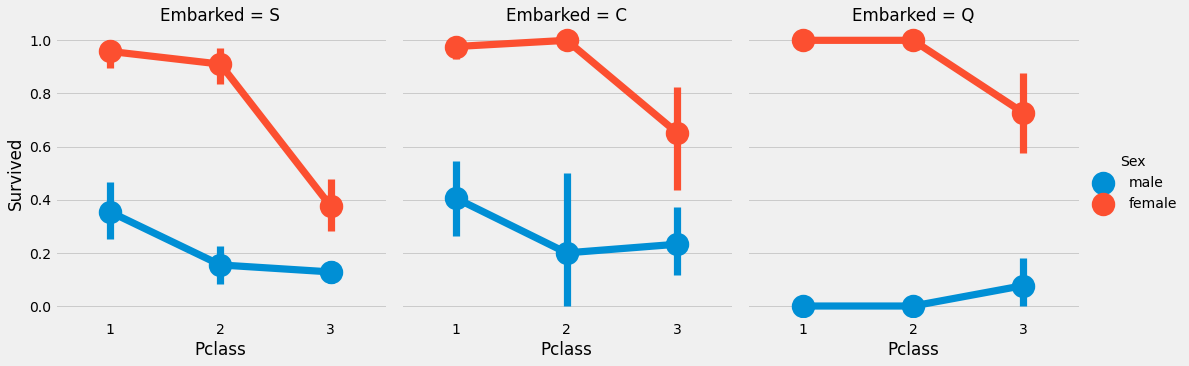

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)
plt.show()

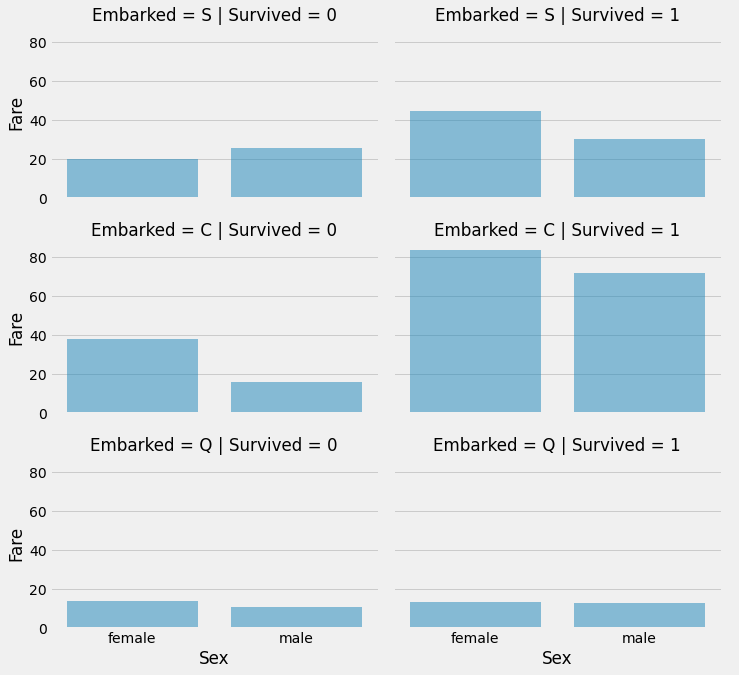

In [25]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived',size=3.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',ci=False,alpha=0.5)
grid.add_legend()

Drop 'Cabin' and 'Ticket' feature

In [26]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df , test_df]
print("Atter", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


('Atter', (891, 10), (418, 9), (891, 10), (418, 9))

In [44]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [46]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,'Rare':5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

   PassengerId  Survived  Pclass  ...     Fare Embarked  Title
0            1         0       3  ...   7.2500        S      1
1            2         1       1  ...  71.2833        C      3
2            3         1       3  ...   7.9250        S      2
3            4         1       1  ...  53.1000        S      3
4            5         0       3  ...   8.0500        S      1

[5 rows x 11 columns]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [48]:
train_df = train_df.drop(["Name",'PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df, test_df]


In [50]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
